# Logistic Regression 2

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

### Load data

In [3]:
! ls -l 'data/Pima_diabetes.csv'

ls: data/Pima_diabetes.csv: No such file or directory


In [4]:
! head 'data/Pima_diabetes.csv'

head: data/Pima_diabetes.csv: No such file or directory


In [5]:
# You can download the original data set from
#  https://www.kaggle.com/uciml/pima-indians-diabetes-database/data
df = pd.read_csv('data/Pima_diabetes.csv')
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'data/Pima_diabetes.csv'

### Examine data

In [6]:
df.head(10)

NameError: name 'df' is not defined

Notice zero values for blood pressure, skin thickness, insulin, BMI, etc.  Ignore for now.  
Target variable: Outcome

In [6]:
# Check for missing values (nulls)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Exploratory data analysis (EDA)
#### EDA to be discussed in a subsequent class

In [7]:
# Compute pairwise correlation of columns, excluding NA/null values
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

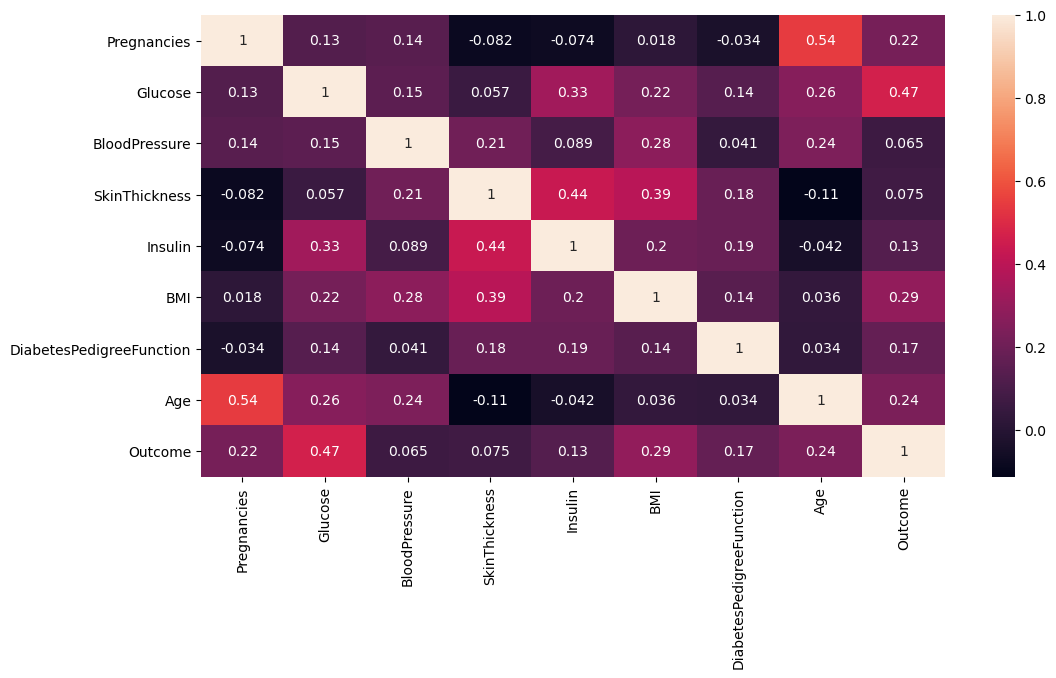

In [8]:
# Plot data as a color-encoded correlation matrix
plt.subplots(figsize=(12,6))
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            annot=True)

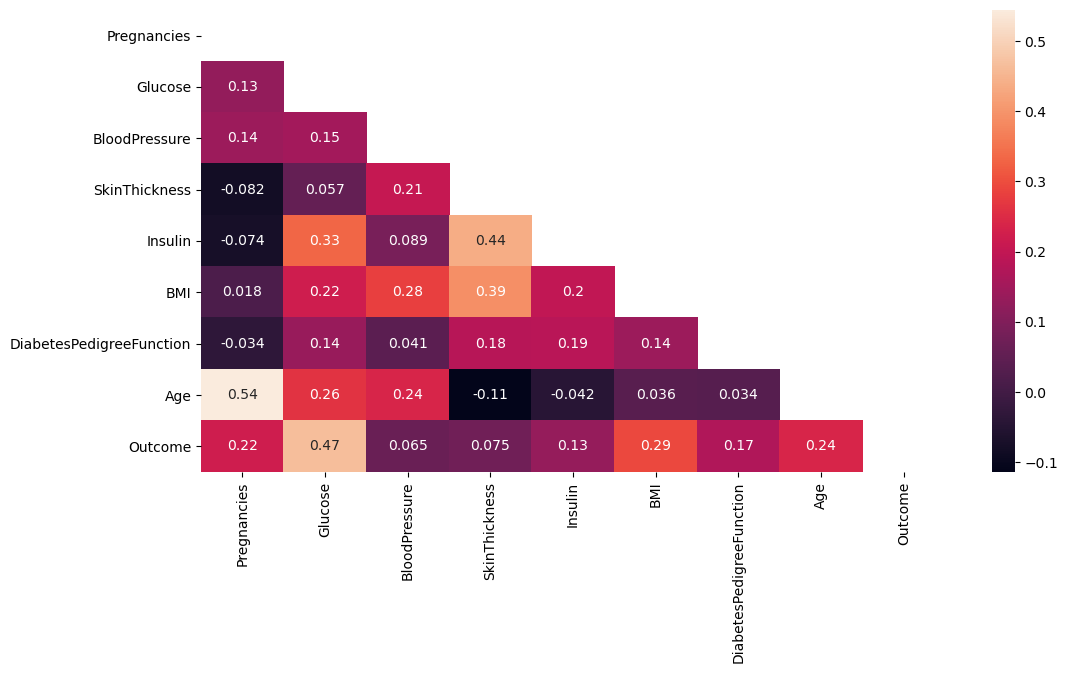

In [9]:
# Plot data as a color-encoded correlation matrix. Only display bottom triangle of matrix.
plt.subplots(figsize=(12,6))
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            annot=True, mask=mask)
plt.savefig('images/DiabetesCorrelationMatrix')

In [10]:
# Review distribution of targets (outcome)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

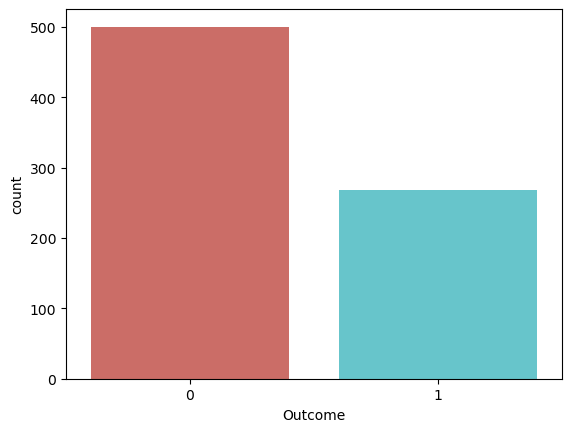

<Figure size 640x480 with 0 Axes>

In [11]:
# Plot outcome counts
sns.countplot(x='Outcome', data=df, palette='hls')
plt.show()
plt.savefig('images/DiabetesOutcome_plot')

### Prepare data

In [12]:
# Separate independent and dependent variables
X = df.iloc[:, :-1]     # feature values - all columns except last one
y = df.iloc[:, -1]      # target values - last column of data frame

In [13]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


#### Normalization and Standardization to be discussed in a subsequent class

In [14]:
# Normalize data values.  Technique used is called min-max normalization.
X_normalized = (X - X.min()) / (X.max() - X.min())

In [15]:
X_normalized.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000


In [16]:
# Standardize data values.  Technique used is called mean normalization.
X_standardized = (X - X.mean()) / X.std()

In [17]:
X_standardized.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483
5,0.342757,-0.153085,0.252871,-1.287373,-0.692439,-0.810813,-0.817546,-0.275580
6,-0.250789,-1.341602,-0.987066,0.718617,0.071158,-0.125895,-0.675693,-0.615709
7,1.826623,-0.184362,-3.570271,-1.287373,-0.692439,0.419502,-1.019762,-0.360612
8,-0.547562,2.380333,0.046215,1.533551,4.019303,-0.189314,-0.947326,1.680164
9,1.233077,0.128406,1.389481,-1.287373,-0.692439,-4.057829,-0.723983,1.765196


#### We could use either the normalized or standardized data values for model training
Note: The training set data could be normalized or standardized, but NOT both

In [18]:
# Split data into 75% training and 25% testing
X_train, X_test, y_train, y_test = \
    train_test_split(X_normalized, y, test_size=0.25, random_state=42)

### Train model

In [19]:
# Train logisitic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Test model

In [20]:
# Generate predictions against the test set
predictions = model.predict(X_test)

### Model evaluation
#### Model performance to be discussed later in this class

In [21]:
# Print classification report
#  Check precision, recall, f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       123
           1       0.67      0.57      0.61        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [22]:
# Display coefficients
coeff = list(model.coef_[0])
coeff

[0.9324831972507297,
 4.4880757725599185,
 -0.441276667347006,
 0.3715840785297819,
 -0.09986303350969289,
 3.198473538019131,
 0.9083868927296085,
 1.7450042505337766]

In [23]:
# Extract feature names
labels = list(X_train.columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Text(0.5, 0, 'Importance')

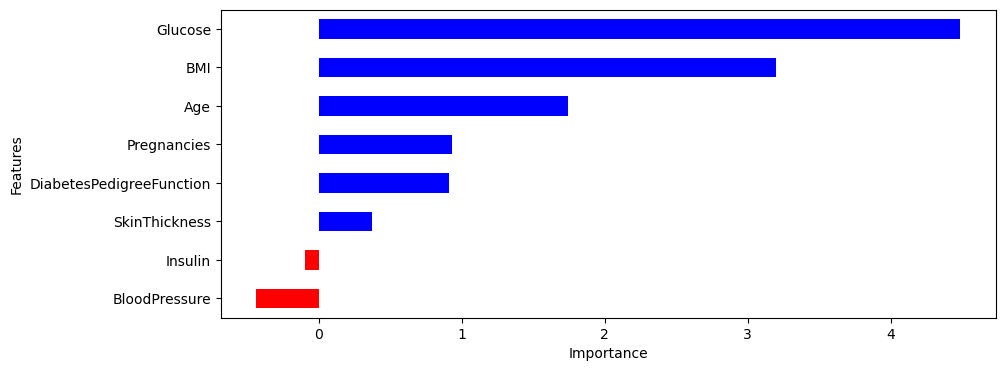

In [24]:
# Visualize how the model uses different features and which features have greater effect
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(10, 4),
                         color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

### Model accuracy

In [25]:
# Calculate model accuracy
accuracy = model.score(X_test, y_test)
print("accuracy =", round((accuracy * 100), 2), "%")

accuracy = 74.48 %


### Save model to file

In [26]:
joblib.dump(model, 'models/diabetes_model.pkl')

['models/diabetes_model.pkl']

### Load model from file

In [27]:
loaded_model = joblib.load('models/diabetes_model.pkl')